#  La Criminalité au Canada

## Equipe 5 A01

Membres: 

- Faustine Marin 
- Hugo 
- Hichem
- Emilie Truca 11237585

## Importation des différentes bibliothèques 
- Requests : utilisée pour télécharger les bases de données, en fichier zip. 
- Zipfile : utilisée pour ouvrir les fichiers zip.
- Pandas (pd): utilisée pour l'analyse de nos données (lecture de fichiers csv, création de dataframes, visualisations relatives aux données...).
- Seaborn (sns): utilisée afin de faire des visualisations de données (diagrammes à barres, graphiques linéaires...).
- Matplotlib.pyplot (plt): cette bibliothèque permet de compléter Seaborn pour utiliser un plus large choix de graphiques/diagrammes.
- Folium (fl): utilisée pour afficher une carte du Canada. Elle devra être installée au préalable :
 `pip install folium`

In [1]:
import requests
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl

ModuleNotFoundError: No module named 'folium'

## Données utilisées

Nous utilisons des données officielles relatives à la criminalité au Canada, disponibles sur sur le site de Statistiques Canada :

- 'crime_severity': indice de gravité de la criminalité au Canada.
- 'crime_stats' : détails des affaires de criminalité au Canada.
- 'homicide' : statisatiques sur les victimes d'homicide au Canada.
- 'cybercrime' : détails des affaires de cybercriminalité au Canada.
- 'cybercrime_geo' : statistiques géographiques des affaires de cybercriminalité au Canada.


Les bases de données complètes sont téléchargeables au format zip. Chaque fichier zip contient deux fichiers .csv : un fichier principal et un fichier de metadonnées. Puisque le fichier zip contient plusieurs fichier, il ne peut être ouvert directement avec pandas. Nous utilisons les libriries requests et zipfile pour extraire les bases de données, avant de les ouvrir avec pandas.

In [4]:
#Fonction permettant de télécharger un fichier
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
            
#Identifiants des bases de données de Statistiques Canada utilisées, ainsi que le nom que nous leur attribuons.
databases={'35100026':'crime_severity',
           '35100177':'crime_stats',
           '35100156':'homicide', 
           '35100001':'cybercrime',
           '35100002':'cybercrime_geo'}

#Création du dictionnaire où seront placées les dataframes.
data={}

#Boucle pour toutes les bases de données à télécharger.
for db_id, db_name in databases.items():
    #Téléchargement du fichier zip.
    download_url('https://www150.statcan.gc.ca/n1/tbl/csv/'+ db_id +'-fra.zip', db_id +'.zip')
    #Ouverture du fichier zip.
    zip_file = ZipFile(db_id +'.zip')
    #Création de la dataframe.
    data[db_name] = pd.read_csv(zip_file.open(db_id +'.csv'), sep=';', low_memory=False)

In [5]:
#Vérification et impression de la dataframe 'crime_severity':
data['crime_severity']

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Statistiques,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
0,1998,Canada,2016A000011124,Indice de gravité de la criminalité,Indice,160,unités,0,v44312461,1.10,118.84,NaN,NaN,NaN,2
1,1998,Canada,2016A000011124,Indice des crimes avec violence,Indice,160,unités,0,v44312463,1.30,97.80,NaN,NaN,NaN,2
2,1998,Canada,2016A000011124,Indice des crimes sans violence,Indice,160,unités,0,v44312465,1.50,126.93,NaN,NaN,NaN,2
3,1998,Canada,2016A000011124,Indice de gravité de la criminalité chez les j...,Indice,160,unités,0,v53079455,1.70,110.24,NaN,NaN,NaN,2
4,1998,Canada,2016A000011124,Indice des crimes avec violence chez les jeunes,Indice,160,unités,0,v53079457,1.90,86.59,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,2019,Nunavut [62],2016A000262,Variation de taux de classement pondéré en pou...,Pourcent,239,unités,0,v53079804,42.14,-12.45,NaN,NaN,NaN,2
17432,2019,Nunavut [62],2016A000262,Taux de classment pondéré des crimes avec viol...,Nombre,223,unités,0,v53079805,42.15,78.81,NaN,NaN,NaN,2
17433,2019,Nunavut [62],2016A000262,Variation de taux de classement pondéré des cr...,Pourcent,239,unités,0,v53079806,42.16,-12.84,NaN,NaN,NaN,2
17434,2019,Nunavut [62],2016A000262,Taux de classement pondéré des crimes sans vio...,Nombre,223,unités,0,v53079807,42.17,55.65,NaN,NaN,NaN,2


In [3]:
#Vérification et impression de la dataframe 'crime_stats':
data['crime_stats']

NameError: name 'data' is not defined

In [128]:
#Vérification et impression de la dataframe 'homicide':
data['homicide']

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Genre,Identité autochtone,Homicides,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
0,2014,Canada,2016A000011124,Toutes les identités de genre,"Total, victimes d'homicide selon l'identité au...",Nombre de victimes d'homicide,Nombre,223,unités,0,v101889680,1.1.1.1,523.00,NaN,NaN,NaN,0
1,2014,Canada,2016A000011124,Toutes les identités de genre,"Total, victimes d'homicide selon l'identité au...",Pourcentage de victimes d'homicide,Pourcent,239,unités,0,v101889681,1.1.1.2,100.00,NaN,NaN,NaN,2
2,2014,Canada,2016A000011124,Toutes les identités de genre,"Total, victimes d'homicide selon l'identité au...",Taux d'homicides pour 100 000 habitants,Taux pour 100 000 personnes,265,unités,0,v1064468063,1.1.1.3,1.48,NaN,NaN,NaN,2
3,2014,Canada,2016A000011124,Toutes les identités de genre,Identité autochtone,Nombre de victimes d'homicide,Nombre,223,unités,0,v101889682,1.1.2.1,121.00,NaN,NaN,NaN,0
4,2014,Canada,2016A000011124,Toutes les identités de genre,Identité autochtone,Pourcentage de victimes d'homicide,Pourcent,239,unités,0,v101889683,1.1.2.2,23.14,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2019,Nunavut,2016A000262,Genre inconnu,Identité non autochtone,Pourcentage de victimes d'homicide,Pourcent,239,unités,0,v101890125,14.4.3.2,0.00,NaN,NaN,NaN,2
5036,2019,Nunavut,2016A000262,Genre inconnu,Identité non autochtone,Taux d'homicides pour 100 000 habitants,Taux pour 100 000 personnes,265,unités,0,v1064468141,14.4.3.3,NaN,..,NaN,NaN,2
5037,2019,Nunavut,2016A000262,Genre inconnu,Identité autochtone inconnue,Nombre de victimes d'homicide,Nombre,223,unités,0,v101890126,14.4.4.1,0.00,NaN,NaN,NaN,0
5038,2019,Nunavut,2016A000262,Genre inconnu,Identité autochtone inconnue,Pourcentage de victimes d'homicide,Pourcent,239,unités,0,v101890127,14.4.4.2,0.00,NaN,NaN,NaN,2


In [129]:
#Vérification et impression de la dataframe 'cybercrime':
data['cybercrime']

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Infraction reliée à la cybercriminalité,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
0,2014,"Canada, certains services de police",NaN,Total des infractions,Nombre,223,unités,0,v116321049,1.10,15184,NaN,NaN,NaN,0
1,2014,"Canada, certains services de police",NaN,Homicide et autres infractions reliées,Nombre,223,unités,0,v116321050,1.20,0,NaN,NaN,NaN,0
2,2014,"Canada, certains services de police",NaN,Incitation à des contacts sexuels,Nombre,223,unités,0,v116321051,1.30,160,NaN,NaN,NaN,0
3,2014,"Canada, certains services de police",NaN,Exploitation sexuelle,Nombre,223,unités,0,v116321052,1.40,11,NaN,NaN,NaN,0
4,2014,"Canada, certains services de police",NaN,Leurre d'un enfant au moyen d'un ordinateur,Nombre,223,unités,0,v116321053,1.50,931,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2019,"Canada, certains services de police",NaN,Manquement aux conditions de la probation,Nombre,223,unités,0,v116321071,1.23,120,NaN,NaN,NaN,0
158,2019,"Canada, certains services de police",NaN,Menaces-biens ou animaux,Nombre,223,unités,0,v116321072,1.24,107,NaN,NaN,NaN,0
159,2019,"Canada, certains services de police",NaN,Infractions contre la personne et la réputatio...,Nombre,223,unités,0,v116321073,1.25,118,NaN,NaN,NaN,0
160,2019,"Canada, certains services de police",NaN,Autres Code Criminel,Nombre,223,unités,0,v116321074,1.26,161,NaN,NaN,NaN,0


In [130]:
#Vérification et impression de la dataframe 'cybercrime_geo':
data['cybercrime_geo']

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Statistiques,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
0,2014,Total des cybercrimes déclarés par la police,NaN,Nombre d'affaires de cybercrime,Nombre,223,unités,0,v116321076,1.1,15184.0,NaN,NaN,NaN,0
1,2014,Total des cybercrimes déclarés par la police,NaN,Taux pour 100 000 habitants,Taux pour 100 000 personnes,265,unités,0,v116321077,1.2,47.7,NaN,NaN,NaN,1
2,2014,Total pour les régions autres que les régions ...,NaN,Nombre d'affaires de cybercrime,Nombre,223,unités,0,v116321078,2.1,5075.0,NaN,NaN,NaN,0
3,2014,Total pour les régions autres que les régions ...,NaN,Taux pour 100 000 habitants,Taux pour 100 000 personnes,265,unités,0,v116321079,2.2,58.1,NaN,NaN,NaN,1
4,2014,Total pour les régions métropolitaines de rece...,NaN,Nombre d'affaires de cybercrime,Nombre,223,unités,0,v116321080,3.1,10109.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2019,Yukon,2016A000260,Taux pour 100 000 habitants,Taux pour 100 000 personnes,265,unités,0,v116321169,47.2,154.2,NaN,NaN,NaN,1
596,2019,Territoires du Nord-Ouest,2016A000261,Nombre d'affaires de cybercrime,Nombre,223,unités,0,v116321170,48.1,55.0,NaN,NaN,NaN,0
597,2019,Territoires du Nord-Ouest,2016A000261,Taux pour 100 000 habitants,Taux pour 100 000 personnes,265,unités,0,v116321171,48.2,122.7,NaN,NaN,NaN,1
598,2019,Nunavut,2016A000262,Nombre d'affaires de cybercrime,Nombre,223,unités,0,v116321172,49.1,27.0,NaN,NaN,NaN,0


## Introduction - Carte interactive

Nous commençons par représenter les données sur une carte, pour disposer d'un premier aperçu géograpique global des crimes au Canada.

Nous choisissons de représenter les données par province. Nous ne disposons pas des mêmes données géographiques selon les bases, il faudra donc les traiter séparémment.

Pour les bases de données `crime_severity` et `crime_stats`, nous disposons de données à plusieurs échelles géographiques : ville, province et national. Les données à garder sont repérées dans la colonne 'GÉO' par lorsque la valeur se termine par un numéro à deux chiffres.(Exemples de valeurs pour 'GÉO': `'Québec [24]'`, `'Montréal, Québec [24462]'`).

Pour les bases de données `homicide` et `cybercrime_geo`, il n'y a pas de numéros dans la colonne 'GÉO'. Il faut seulement enlever les données au niveau national.

Nous n'utiliserons pas ici la base de données `cybercrime` qui contient uniquement les données au niveau national.

Les bases de données sont aussi filtrées pour conserver uniquement les données relatives aux provinces pour l'année 2019.

Pour représenter les données sur la carte, nous devons aussi ajouter une colonne contenant le nom des province canadiennes en anglais. En effet, nous utilisons un fichier .geojson contenant les contours géographiques de chaque province, mais qui est en anglais.

Le message d'erreur affiché lors de l'exécution est un avertissement sur l'usage de la fonction map(). Cele ne pose aucun problème pour l'utilisation que l'on en fait.

In [17]:
#Filtrage temporel et géographique des bases de données.

#Création du dictionnaire où seront placées les données de la carte.
map_data={}

#Liste des provinces canadiens en anglais, dans le même ordre que dans la base de données.
states_list_en=['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 
                'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon Territory',
                'Northwest Territories', 'Nunavut']

#Bases de données crime_severity et crime_stats.

#Liste des valeurs de la colonne 'GÉO'.
geo_list = list(data['crime_severity']["GÉO"].unique())

#Extraction des valeurs correspondants aux états, qui finissent par un numéro à deux chiffres.
#Une lambda fonction implémente la condition sur la longueur de la chaîne de caractère qui suit le caractère '['.
states_list_fr=list(filter(lambda x: len(x.split('[')[-1])==3, geo_list))

#Association des noms de provinces français et anglais.
GÉO_FR_EN = {states_list_fr[i]: states_list_en[i] for i in range(len(states_list_fr))}

#Filtrage des bases de données pour garder les données de 2019 au niveau des provinces.
for df_name in ['crime_severity', 'crime_stats']:
    map_data[df_name] = data[df_name][(data[df_name]["GÉO"].isin(states_list_fr))
                                    & (data[df_name]["PÉRIODE DE RÉFÉRENCE"] == 2019)]
    
    map_data[df_name]["GÉO_EN"]=map_data[df_name]["GÉO"].map(GÉO_FR_EN)

    
#Bases de données homicide et cybercrime_geo.
    
#Filtrage des données au niveau national pour les cybercrimes et les homicides.
states_list_fr = list(data['homicide']["GÉO"].unique())[1:]
GÉO_FR_EN = {states_list_fr[i]: states_list_en[i] for i in range(len(states_list_fr))}

for df_name in ['cybercrime_geo', 'homicide']:
    map_data[df_name] = data[df_name][(data[df_name]["GÉO"].isin(states_list_fr))
                                    & (data[df_name]["PÉRIODE DE RÉFÉRENCE"] == 2019)]
    
    map_data[df_name]["GÉO_EN"]=map_data[df_name]["GÉO"].map(GÉO_FR_EN)


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
#Chargement du fichier geojson contenant les limites de chaque État du Canada.
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data'
canada_states = f'{url}/canada.geojson'

#Création de la carte, centrée sur le Canada.
m = fl.Map(location=[68, -100], zoom_start=3)

#Ajout de la couche contenant l'indice de gravité de la criminalité.
fl.Choropleth(
    geo_data=canada_states,
    name='Indice de gravite de la criminalite',
    data=map_data['crime_severity'][map_data['crime_severity']["Statistiques"] == "Indice de gravité de la criminalité"],
    columns=['GÉO_EN', 'VALEUR'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Indice de gravite de la criminalite'
).add_to(m)

#Ajout de la couche contenant le nombre d'affaires réel.
fl.Choropleth(
    geo_data=canada_states,
    name="Nombre d affaires reel",
    data=map_data['crime_stats'][map_data['crime_stats']["Statistiques"] == "Nombre d'affaires réel"],
    columns=['GÉO_EN', 'VALEUR'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Nombre d affaires reel"
).add_to(m)

#Ajout de la couche contenant le nombre d'affaires de cybercrime.
fl.Choropleth(
    geo_data=canada_states,
    name="Nombre d affaires de cybercrime",
    data=map_data['cybercrime_geo'][map_data['cybercrime_geo']["Statistiques"] == "Nombre d'affaires de cybercrime"],
    columns=['GÉO_EN', 'VALEUR'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Nombre d affaires de cybercrime"
).add_to(m)

#Ajout de la couche contenant le nombre d'homicides autochtones.
fl.Choropleth(
    geo_data=canada_states,
    name="Nombre de victimes d homicide autochtone",
    data=map_data['homicide'][(map_data['homicide']["Homicides"] == "Nombre de victimes d'homicide") 
                                      & (map_data['homicide']["Identité autochtone"] == "Identité autochtone")],
    columns=['GÉO_EN', 'VALEUR'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Nombre de victimes d homicide autochtone"
).add_to(m)


#Ajout de l'interface de contrôle.
fl.LayerControl().add_to(m)

#Affichage de la carte.
m

NameError: name 'fl' is not defined

### Résultats

 Pour les chaque provinces, cette carte nous permet de voir: 
 
 * L'indice de gravité de criminalité : on remarque que l'indice est plus élevé pour les provinces du Nord.
 
 * Le nombre d'affaires de cybercrime:  on remarque que le nombre est plus élévé pour la Colombie-Britanique et pour l'Ontario.
 
 * Le nombre d'affaire réel:  on remarque que le nombre est plus élévé pour la Colombie-Britanique.
 
 * Le nombre de victimes autochtones:  on remarque que le nombre de victimes d'origine Autochtone est plus élevé en Alberta, au Saskatchewan et au Manitoba.
 
 

## Graphiques

Dans cette section, nous allons analyser plus en détails les données vues précédemment et chercher à savoir ce qui peut expliquer, en partie, l'augmentation de l'indice de gravité au Canada.

## Graph1- Evolution des indices de criminalité

Text(0, 0.5, 'Valeur Indice')

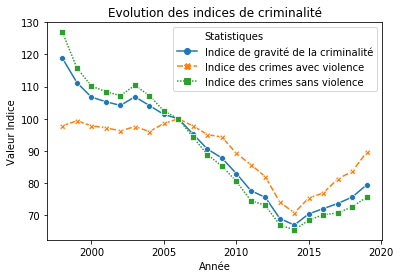

In [10]:
#Création d'un graphique à lines avec seaborn, présentant l'évolution des indices des crimes ainsi que de l'indices de gravité de criminalité:
sns.lineplot(x='PÉRIODE DE RÉFÉRENCE', y='VALEUR', hue="Statistiques", data=data['crime_severity'][
                (data['crime_severity']["GÉO"] == "Canada") 
                & (data['crime_severity']["UNITÉ DE MESURE"]=="Indice")
                & (~data['crime_severity']["Statistiques"].str.contains("jeunes"))
                ],style="Statistiques", markers=True)


#Création d'un titre pour le graphique et de titres pour les axes:
plt.title('Evolution des indices de criminalité')
plt.xlabel('Année')
plt.ylabel('Valeur Indice')


### Résultat
- On remarque que depuis 2014, il y a une augmentation constante des différents indices. 
- Le minimum a été atteint en 2014 pour l'ensemble des indices de 1998 à 2019.

## Graph2- Indice de gravité de criminalité par province du Canada

Text(0, 0.5, 'Provinces')

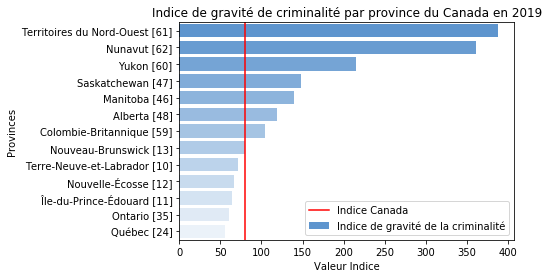

In [11]:
#On filtre les données afin d'avoir uniquement celles pour 2019 et pour l'indice de gravité de criminalité
#On trie les valeur des indices de manière décroissante

plot_df = map_data['crime_severity'][
                (map_data['crime_severity']["Statistiques"] == "Indice de gravité de la criminalité")
                ].sort_values(by=['VALEUR'],ascending=False)

#On applique un dégrader de couleur afin d'avoir les plus grandes valeurs en plsu foncé
palette = sns.light_palette((248, 80, 60), len(plot_df), input="husl", reverse=True)

#On créer le graphique à barre horizontal:
sns.barplot(x='VALEUR', y='GÉO', data=plot_df
               ,orient = 'h'
               ,ci=None,
               palette=palette)

#On ajoute au graphique une ligne verticale, représentant l'indice de gravité de criminalité au Canada en 2019
plt.axvline(79.45, color="r", linestyle="-");
plt.legend(['Indice Canada',"Indice de gravité de la criminalité"], ncol=1, loc='lower right');


#Création d'un titre pour le graphique et de titres pour les axes:
plt.title('Indice de gravité de criminalité par province du Canada en 2019')
plt.xlabel('Valeur Indice')
plt.ylabel('Provinces')


### Résultat
- Les provinces ayant le plus grand indice de gravité de criminalité sont : les Territoire du Nord-Ouest, le Nunavut, le Yukon, le Sakatchewan, le Manitoba, l'Alberta et la Colombie-Britanique.

## Graph3- Evolution de la cybercriminalité par catégories

Text(60.6921875, 0.5, 'Nombre de cybercrimes')

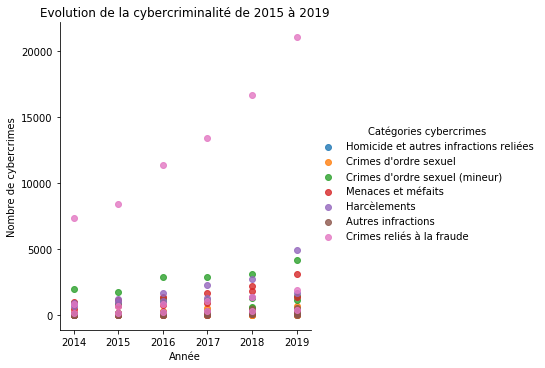

In [12]:
#Dans notre dataframes, nous avons une grande catégorie de cybercrimes.
#Nous allons chercher à grouper les crimes afin de rendre le graphique plus lisible.
#Pour cela, nous définissons dans une liste les groupes de crimes souhaités :
cybercrimes_list=['Total des infractions',"Crimes d'ordre sexuel","Crimes d'ordre sexuel (mineur)","Crimes reliés à la fraude","Menaces et méfaits",
                "Harcèlements","Homicide et autres infractions reliées","Autres infractions avec violence","Autres infractions non violentes",
               "Défaut de se conformer à une ordonnance","Manquement aux conditions de la probation","Autres Code Criminel","Autres infractions"]

#Création d'un dictionnaire où sont associé les différents cybercrimes à leur groupe de cybercrimes.
groupe_cyber_dict={'Total des infractions': "Total des infractions", 
                   'Homicide et autres infractions reliées': "Homicide et autres infractions reliées ",
                   'Incitation à des contacts sexuels': "Crimes d'ordre sexuel", 
                   'Exploitation sexuelle': "Crimes d'ordre sexuel",
                   "Leurre d'un enfant au moyen d'un ordinateur":"Crimes d'ordre sexuel (mineur)", 
                   'Voyeurisme': "Crimes d'ordre sexuel",
                   "Distribution nonconsensuelle d'images intimes": "Crimes d'ordre sexuel", 
                   'Extorsion': "Menaces et méfaits",
                   'Harcèlement criminel': "Harcèlements", 
                   'Communications indécentes ou harcelantes': "Harcèlements" ,
                   'Menaces': "Menaces et méfaits", 
                   'Autres infractions avec violence':'Autres infractions' , 
                   'Fraude': "Crimes reliés à la fraude",
                   "Vol d'identité":"Crimes reliés à la fraude", 
                   "Fraude à l'identité":"Crimes reliés à la fraude" ,
                   'Méfaits': "Menaces et méfaits",
                   'Autres infractions non violentes': 'Autres infractions',
                   'Défaut de se conformer à une ordonnance':'Autres infractions', 
                   'Actions indécentes': "Crimes d'ordre sexuel",
                   'Pornographie juvénile': "Crimes d'ordre sexuel (mineur)",
                   'Production de ou distribution de pornographie juvénile': "Crimes d'ordre sexuel (mineur)",
                   'Corruption des moeurs': "Crimes d'ordre sexuel",
                   'Manquement aux conditions de la probation': 'Autres infractions',
                   'Menaces-biens ou animaux': "Menaces et méfaits",
                    'Infractions contre la personne et la réputation (partie VIII du Code criminel)': "Menaces et méfaits",
                    'Autres Code Criminel': 'Autres infractions', 
                   'Autres infractions':'Autres infractions'}

#On ajoute nos nouvelles catégorie à notre dataframes en associant les crimes à leur catégorie grâce au dictiionnaire créer au préalable
data['cybercrime']["Catégories cybercrimes"]=data['cybercrime']["Infraction reliée à la cybercriminalité"].map(groupe_cyber_dict)

# On filtre pour enlever la ligne total des cybercrimes
lmplot_df=data['cybercrime'][(data['cybercrime']["Infraction reliée à la cybercriminalité"] != "Total des infractions")]

# Création du graphique à bulles:
sns.lmplot('PÉRIODE DE RÉFÉRENCE', 'VALEUR', data=lmplot_df, hue="Catégories cybercrimes", fit_reg=False)

#Création d'un titre pour le graphique et de titres pour les axes:
plt.title('Evolution de la cybercriminalité de 2015 à 2019')
plt.xlabel('Année')
plt.ylabel('Nombre de cybercrimes')


### Résultat

- On remarque les deux catégories de cybercrimes ayant les plus grandes valeurs sont : les crimes reliés à la fraude et les crimes d'ordre sexuel sur mineur.
- Ces deux catégories sont en croissance depuis 2015.

## Graph4- Évolution du nombre de cybercrimes par province

Text(0, 0.5, 'Nombre de cybercrimes')

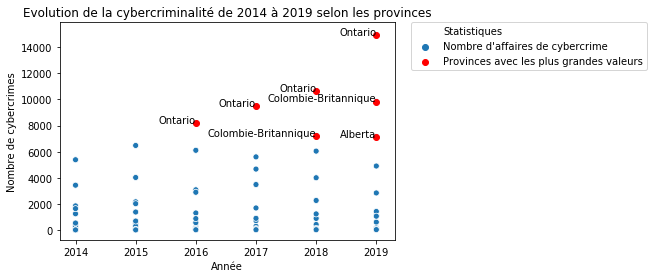

In [13]:
states_list_fr = list(data['homicide']["GÉO"].unique())[1:]

#On crée le graphique à bulle 
ax = sns.scatterplot(x="PÉRIODE DE RÉFÉRENCE", y='VALEUR',
                      hue="Statistiques",
                      data=data['cybercrime_geo'][
                          (data['cybercrime_geo']["GÉO"].isin(states_list_fr))
                        & (data['cybercrime_geo']["Statistiques"]=="Nombre d'affaires de cybercrime")
                        & (data['cybercrime_geo']["GÉO"]!="Total des cybercrimes déclarés par la police")])


df= data['cybercrime_geo'][(data['cybercrime_geo']["GÉO"].isin(states_list_fr))
                        & (data['cybercrime_geo']["GÉO"]!="Total des cybercrimes déclarés par la police")]                             

#On créer un dataframe avec les valeur supérieur à 7000
df = df.query("VALEUR > 7000")

# On attribue la couleur rouge à ces données
plt.scatter(x="PÉRIODE DE RÉFÉRENCE", y='VALEUR',
            data=df[(df["Statistiques"]=="Nombre d'affaires de cybercrime")
                 &(df["GÉO"]!="Total des cybercrimes déclarés par la police")
                   ],
                 color="red",label="Provinces avec les plus grandes valeurs")


# On affiche le nom des pays à côté (à droite) des plus grandes veleurs affichées en rouge
for i in range(df.shape[0]):
    plt.annotate(df["GÉO"].tolist()[i], (df["PÉRIODE DE RÉFÉRENCE"].tolist()[i], df['VALEUR'].tolist()[i]), ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

#Création d'un titre pour le graphique et de titres pour les axes:
plt.title('Evolution de la cybercriminalité de 2014 à 2019 selon les provinces')
plt.xlabel('Année')
plt.ylabel('Nombre de cybercrimes')

### Résultat: 
- Les provinces avec les grands nombre de cybercrimes sont l'Ontario, la Colombie-Britannique et l'Alberta.
- Le nombres de cybercrimes est en augmenattions en général dans les différentes provinces

## Graph5- Répartition des victimes d'homicides selon le genre au Canada en 2019

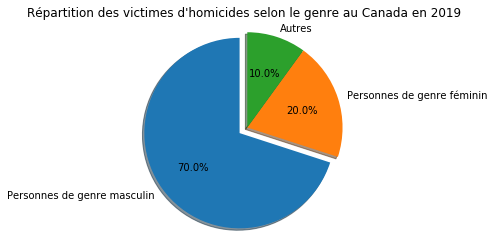

In [14]:
# On crée une liste contenant le nombre de victimes d'homicides selon le genre
victime_genre=data['homicide'][
                (data['homicide']["PÉRIODE DE RÉFÉRENCE"]==2019)
                &(data['homicide']["GÉO"]=='Canada')
                &(data['homicide']["Identité autochtone"]=='Total, victimes d\'homicide selon l\'identité autochtone')
                &(data['homicide']["Homicides"]=='Nombre de victimes d\'homicide')
                &(data['homicide']["Genre"].isin(['Toutes les identités de genre', 'Personnes de genre masculin', 'Personnes de genre féminin']))
            ]["VALEUR"].tolist()

#On calcule le pourcentage de victimes d'homicide selon le genre
victime_genre=[x/victime_genre[0] for x in victime_genre[1:]]
victime_genre.append(1-sum(x for x in victime_genre))

# On arrondi les nombres à un chiffre après la virgule
round_victime_genre = [round(num, 1) for num in victime_genre]


# Graphique à secteurs, où les tranches seront ordonnées et tracées dans le sens antihoraire:
labels = 'Personnes de genre masculin', 'Personnes de genre féminin', 'Autres',
sizes = round_victime_genre

#"exploser" seulement la 1ère tranche (c'est-à-dire "Personnes de genre masculin")
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Un rapport hauteur / largeur égal garantit que le secteur est dessiné sous forme de cercle
ax1.axis('equal') 

#Création d'un titre pour le graphique:
plt.title("Répartition des victimes d'homicides selon le genre au Canada en 2019")

plt.show()

### Résultat
- Les Hommes sont les plus suceptibles d'être victime d'homicides

## Graph6- Evolution du taux d'homicides pour 100 000 habitants

Text(0, 0.5, "taux d'homicides pour 100 000 habitants")

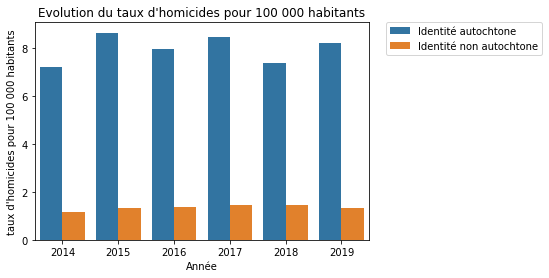

In [15]:
# Création du diagramme à barre:
sns.barplot(x="PÉRIODE DE RÉFÉRENCE", y='VALEUR', hue='Identité autochtone', data=data['homicide'][
                (data['homicide']["Identité autochtone"].isin(['Identité autochtone', 'Identité non autochtone']))
               &(data['homicide']["GÉO"]=='Canada')
            &(data['homicide']["Homicides"]=="Taux d'homicides pour 100 000 habitants")]
                 ,ci=None)

# On met la légend à côté du diagramme
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Création d'un titre pour le graphique et de titres pour les axes:
plt.title("Evolution du taux d'homicides pour 100 000 habitants")
plt.xlabel('Année')
plt.ylabel("taux d'homicides pour 100 000 habitants") 



### Résulat
- Le taux d'homicides chez les Autochtones est environ six fois plus élevé que chez les non-Autochtones au Canada (pour 100 000 habitants).
- Il y a une augementation générale du taux d'homicides pour 100 000 habitants au Canada.

## Conclusion
- On voit que l'indice de gravité de criminalité du Canada a augmenter.
- L'augmentation du taux d'homicides autochtones et l'augmentation des cybercrimes (principalement la fraude et les cybercrimes d'ordre sexuel pour les mineur) peuvent en partie expliquer les résultats de l'indice de criminalité. 